Загрузим необходимые библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style("darkgrid")

Загрузим и прочитаем файлы:

In [2]:
query_1 = pd.read_csv('/datasets/query_1.csv')
query_3 = pd.read_csv('/datasets/query_3.csv') 

Выведим на экран таблицу *query_1* и посмотрим ее общую информацию:

In [3]:
query_1

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
query_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


С данными все в порядке.

Переходим к таблице *query_3*:

In [5]:
query_3

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [6]:
query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [7]:
query_3.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


В целом все в порядке, пропусков и аномалий нет, но число полетов имеет тип *float()*. Для удобства заменим их на целочисленные:

In [8]:
query_3['average_flights'] = query_3['average_flights'].astype('int')
query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


Все в порядке.

Создадим список Топ-10 городов по количеству рейсов:

In [9]:
top10_cities = query_3.nlargest(10, ['average_flights'])
top10_cities

,city,average_flights
43,Москва,129
70,Санкт-Петербург,31
54,Новосибирск,17
20,Екатеринбург,11
33,Красноярск,11
10,Брянск,10
63,Пермь,10
67,Ростов-на-Дону,10
73,Советский,9
74,Сочи,9


Москва с большим отрывом ушла вперед. 

Переходим к построению графиков.

**График 1. "Модели самолётов и количество рейсов"**.

Передадим переменной *models* таблицу с упорядоченным по убыванию числом рейсов и построим график:

In [10]:
models = query_1.sort_values(by='flights_amount', ascending=False)

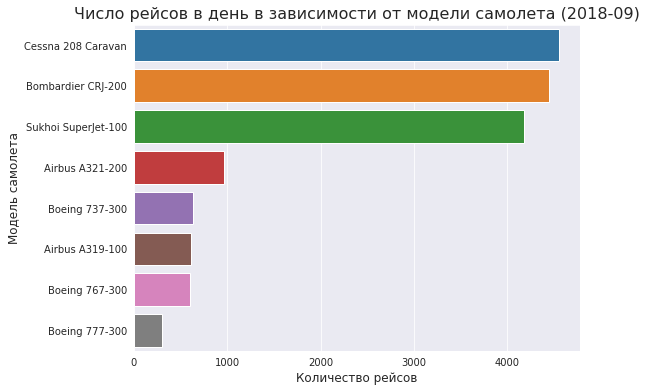

In [11]:
plt.figure(figsize=(8, 6))
plt.title('Число рейсов в день в зависимости от модели самолета (2018-09)', fontsize=16)

sns.barplot(x='flights_amount', y='model', data=models)
plt.xlabel('Количество рейсов', fontsize=12)
plt.ylabel('Модель самолета', fontsize=12)
plt.show()

Легкие и сравнительно небольшие пасажирские самолеты моделей Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100 наиболее востребованы для ближнемагистральных авиоперелетов. Поэтому и число рейсов данных моделей значительно больше. 

Остальные модели больше подходят для средних и дальних перелетов. Меньше всего перелетов у крупнейшего в мире Boeing 777-300. 

**График 2. "Города и количество рейсов"**.

Передадим переменной *cities* таблицу с упорядоченным по убыванию числом рейсов и построим график:

In [12]:
cities = query_3.sort_values(by='average_flights', ascending=False)

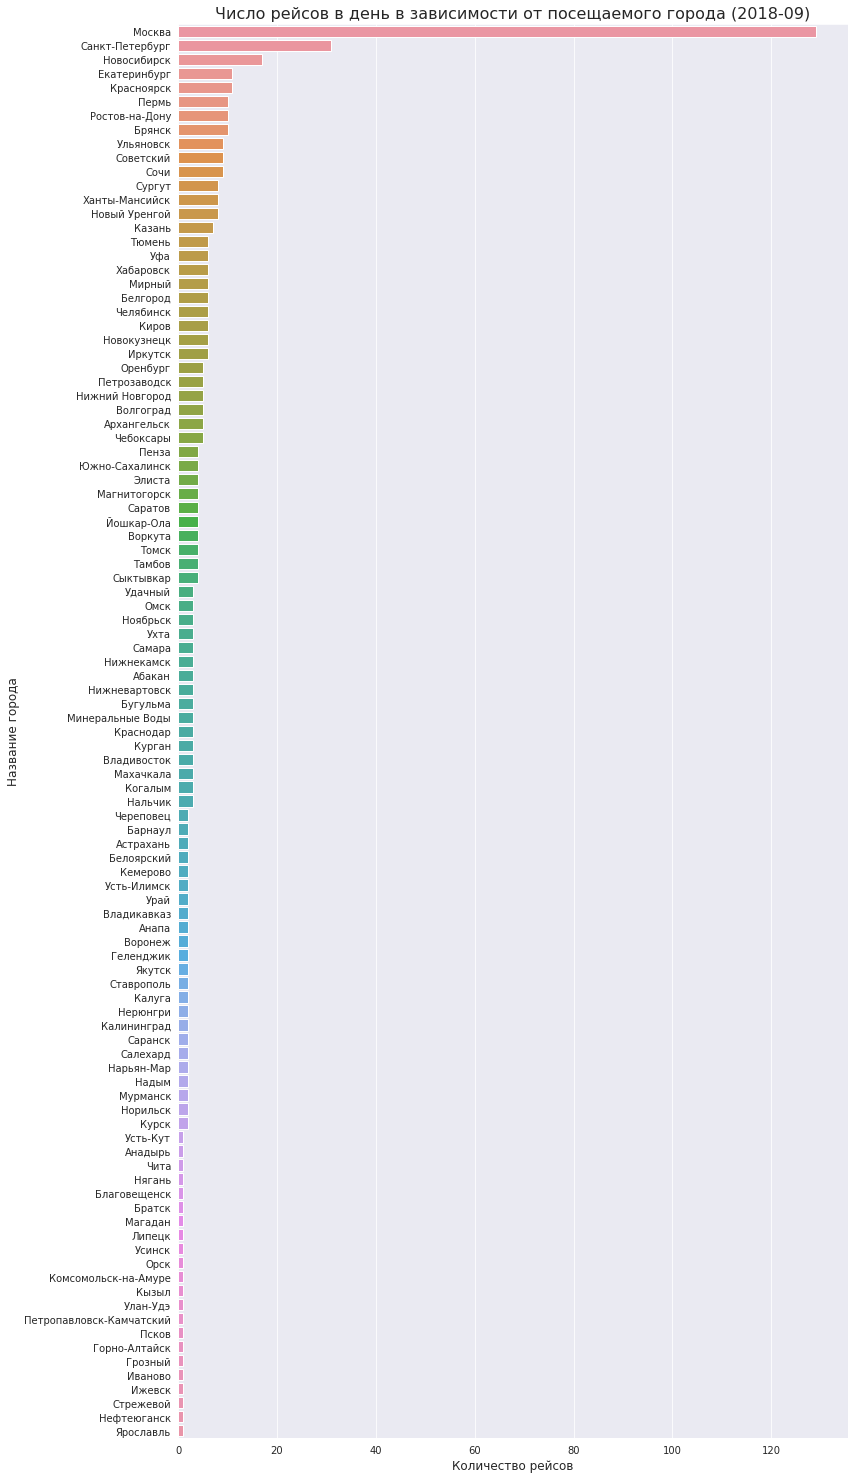

In [13]:
plt.figure(figsize=(12, 26))
plt.title('Число рейсов в день в зависимости от посещаемого города (2018-09)', fontsize=16)

sns.barplot(x='average_flights', y='city', data=cities)
plt.xlabel('Количество рейсов', fontsize=12)
plt.ylabel('Название города', fontsize=12)
plt.show()

Чаще всего посещают Москву. Это понятно, здесь много аэропортов и возможностей осуществлять пересадки в другие города и страны. В 4 раза реже прилетают в Питер. Новосибирск, Екатеринбург, Красноярск тоже вошли Топ-5. Однако в большую часть городов совершается не более 5-10 рейсов в день.

**График 3. "Топ-10 городов и количество рейсов"**.

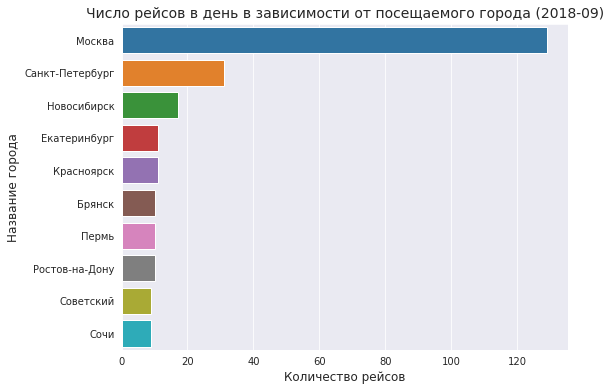

In [14]:
plt.figure(figsize=(8, 6))
plt.title('Число рейсов в день в зависимости от посещаемого города (2018-09)', fontsize=14)

sns.barplot(x='average_flights', y='city', data=top10_cities)
plt.xlabel('Количество рейсов', fontsize=12)
plt.ylabel('Название города', fontsize=12)
plt.show()

Вот и определена десятка самых посещаемых городов России в сентябре 2018 года. При этом в большинстве городов, кроме Москвы, Санкт-Петербурка и Новосибирска, число рейсов не превысило 11.

## Общий вывод

Проведенный анализ показал, что внутри России в течение сентября 2018 года было совершено некоторое количество перелетов. Наибольшим спросом пользовались Москва, Санкт-Петербург и Новосибирск - крупные российские хабы. Среди моделей самолетов наиболее используемыми оказались Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100. 